# Explore the area likely to experience crime with seasonal and teporal change

### Introduction

The dataset is provided by Chicago Data Portal, And Data is extracted from the Chicago Police Department's CLEAR system https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data. This dataset reflects reported incidents of crime that occured in the city of Chicago from 2001 to present. it records various types of crime with exception of murders. This project will analyze which areas in the city will have the most crime with different seasons and day time period. With briefly looking into the dataset, most crime are theft, and committed on the street.

The Y-variable is "ID". It is used to count the total number of crime.

The X-variables are "Year", "Month", "Time", "Location". “Year”, “month”, and “time” indicate the year, month, and time at which each crime incident occurred. "Location" combined “Longitude” and "Latitude" together indicates the location where each rime incident occurred. 

"Year":This variable helps in identifying long-term trends in crime incidents. "Month": This variable allows the seasonal pattern in crime occurrence, Crime rates can vary significantly across different seasons due to various factors such as weather conditions. "Time": Analyzing the time when crimes occur is vital for understanding daily patterns, such as whether crimes are more frequent during day or nigh. "Location": Spatial analysis is crutial to the research question, it's used to pinpoint the exact location of crime incidents. This enables a detail exploration of crime hotspots. 

These x variables are foundamental for a comprehensive analysis which seeks to answer the research question. By correlation these variables with the incidence of crime, this can give an idea when and where crimes are more likely to occur. This analysis is crutial for developing strategies for crime prevention and resource allocation.

In [1]:
import pandas as pd
import qeds
%matplotlib inline
 # activate plot theme
import qeds
import matplotlib.pyplot as plt

from IPython.display import display

### Data Cleaning 

In [2]:
url = "Crimes_-_2001_to_Present_20240130.csv"
df = pd.read_csv(url)
columns = ['Year'] + [col for col in df.columns if col != 'Year']
df = df[columns]

In [3]:
# checking the duplicated data in case some cases are reported multiple times.
df = df.drop_duplicates("ID")

In [4]:
# First Checking which columns contain Nah value, in case deleting the rows which have nah value but contain other
# important stuff.

columns_with_nan = df.isna().any()
print(columns_with_nan)

Year                          False
ID                            False
Case Number                   False
Date                          False
Block                         False
IUCR                          False
Primary Type                  False
Description                   False
Location Description           True
Arrest                        False
Domestic                      False
Beat                          False
District                       True
Ward                           True
Community Area                 True
FBI Code                      False
X Coordinate                   True
Y Coordinate                   True
Updated On                    False
Latitude                       True
Longitude                      True
Location                       True
Historical Wards 2003-2015     True
Zip Codes                      True
Community Areas                True
Census Tracts                  True
Wards                          True
Boundaries - ZIP Codes      

In [5]:
# Drop the Nah value from these rows which are useful to my research.
df = df.dropna(subset=['Location'])

In [6]:
# Converting the original 'Date' into Datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
# Extracting month and time from Datetime, in order to better assist the further research
df['Month'] = df['Date'].dt.month
df['Time'] = df['Date'].dt.time
df[['Date', 'Month', 'Time']]
df.head()

,Year,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Month,Time
11,2020,12045583,JD226426,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,...,12.0,4301.0,1.0,446.0,9.0,36.0,24.0,101.0,5,10:24:00
12,2020,12031001,JD209965,2020-04-16 05:00:00,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,...,26.0,21194.0,58.0,223.0,48.0,40.0,23.0,170.0,4,05:00:00
13,2020,12093529,JD282112,2020-07-01 10:16:00,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,...,43.0,21202.0,42.0,505.0,37.0,25.0,19.0,234.0,7,10:16:00
14,2020,12178140,JD381597,2020-09-27 23:29:00,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,...,44.0,22257.0,65.0,281.0,3.0,23.0,17.0,205.0,9,23:29:00
15,2005,4144897,HL474854,2005-07-10 15:00:00,062XX S ABERDEEN ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,...,19.0,21559.0,66.0,434.0,2.0,11.0,17.0,261.0,7,15:00:00


### Summary Statistics Tables

In [7]:
df['Month'] = df['Month'].astype('category')
df['Year'] = df['Year'].astype('category')
df.describe(include = "all")

/var/folders/7q/4cy2ncwn1tx6s2wxyng4_l1w0000gn/T/ipykernel_31325/2403721016.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = "all")


,Year,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Month,Time
count,7898640.0,7.898640e+06,7898640,7898640,7898640,7898640,7898640,7898640,7890749,7898640,...,7.875087e+06,7.898640e+06,7.878278e+06,7.880311e+06,7.878399e+06,7.878331e+06,7.879458e+06,7.879484e+06,7898640.0,7898640
unique,24.0,NaN,7898083,3283123,61970,403,36,546,217,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,85150
top,2001.0,NaN,HZ140230,2007-01-01 00:01:00,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,12:00:00
freq,482877.0,NaN,6,172,16295,639967,1666063,931528,2070806,5859186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,734401.0,182862
first,NaN,NaN,NaN,2001-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2024-01-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.170816e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.742117e+01,1.908890e+04,3.868966e+01,3.810766e+02,2.559066e+01,3.153180e+01,1.491966e+01,1.502043e+02,NaN,NaN
std,NaN,3.584757e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.525245e+01,5.748504e+03,2.006934e+01,2.303197e+02,1.472498e+01,1.913400e+01,6.449355e+00,7.853059e+01,NaN,NaN
min,NaN,6.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,2.733000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN
25%,NaN,3.866876e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.400000e+01,2.118400e+04,2.500000e+01,1.760000e+02,1.200000e+01,1.500000e+01,1.000000e+01,8.300000e+01,NaN,NaN


*From the summary statistics table, it canbe ssen that from 2001 to present, there are 7898640 repoted criminal cases in Chicago, with the highest proportion of crime reports occurring in 2001, and the main type of crime is theft. From 2001 to the present, the month most tned to have criminal incidents is July, with 12 p.m. being the most likely time for crimes to occur, and the most prone location is (41.976290414, -87.905227221), which is the airport. These data give us an intial idea of the most likely places an time for crimnial cases to occur.

In [8]:
df['Location'].describe(include = "all")

count                           7898640
unique                           896866
top       (41.976290414, -87.905227221)
freq                              14432
Name: Location, dtype: object

In [9]:
df["Year"].describe(include = 'all')

count     7898640
unique         24
top          2001
freq       482877
Name: Year, dtype: int64

### Plots

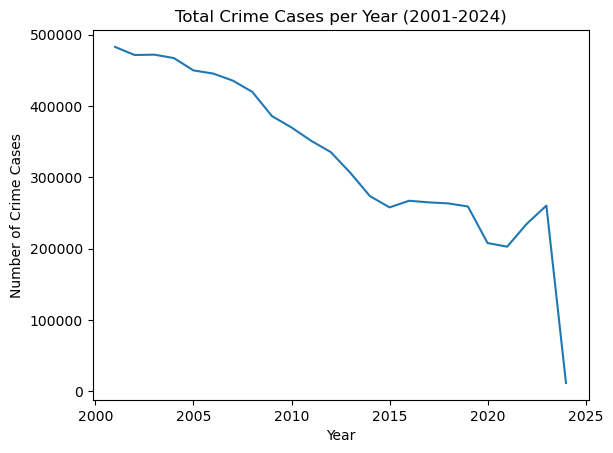

In [12]:


# Assuming 'your_dataset.csv' is the path to your dataset file
# and it has columns 'ID' and 'Year'


# Group by 'Year' and count 'ID'
yearly_crime_counts = df.groupby('Year')['ID'].count()

# Plot
plt.plot(yearly_crime_counts.index, yearly_crime_counts.values)
plt.title('Total Crime Cases per Year (2001-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Crime Cases')
plt.show()


*The x variable here is Year, and the y variable is number of crime cases. From the gragh, we could observe a significant decline in crime rates from 2001 to 2023(since it's only one month record in 2024, it's not comparable). There was an increase between 2020 and 2023, which could be inferred to be caused by the rise in unemployment rates and increasing prices following the outbreak of the pandamic.

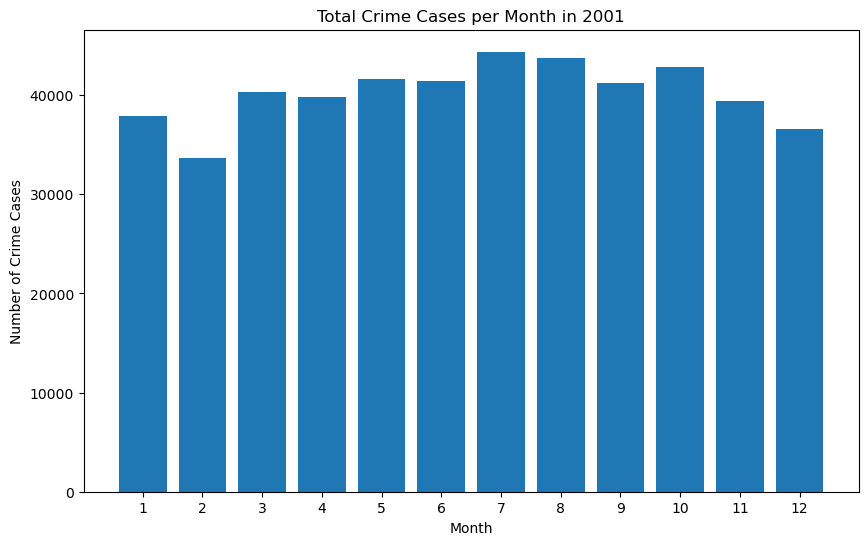

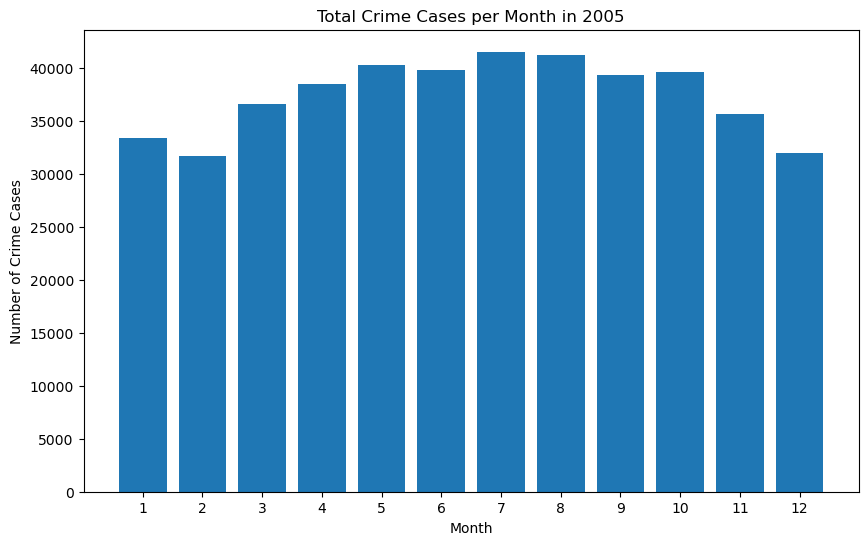

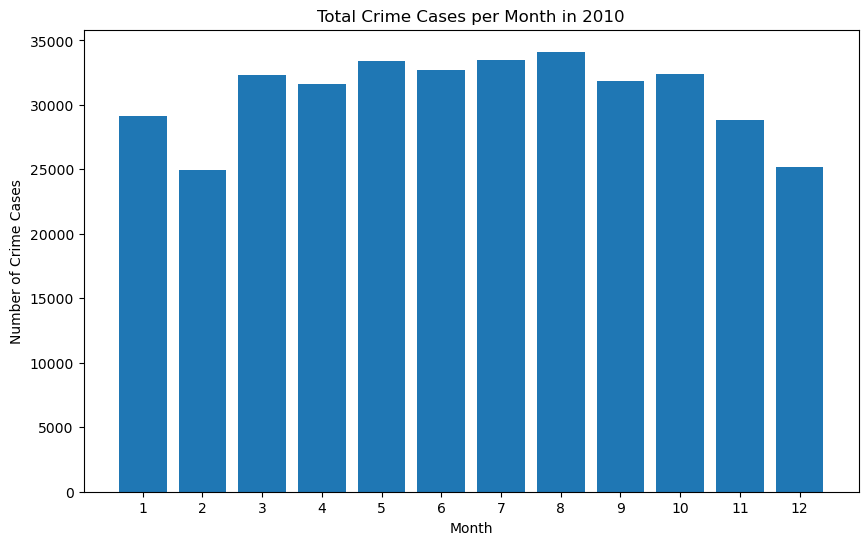

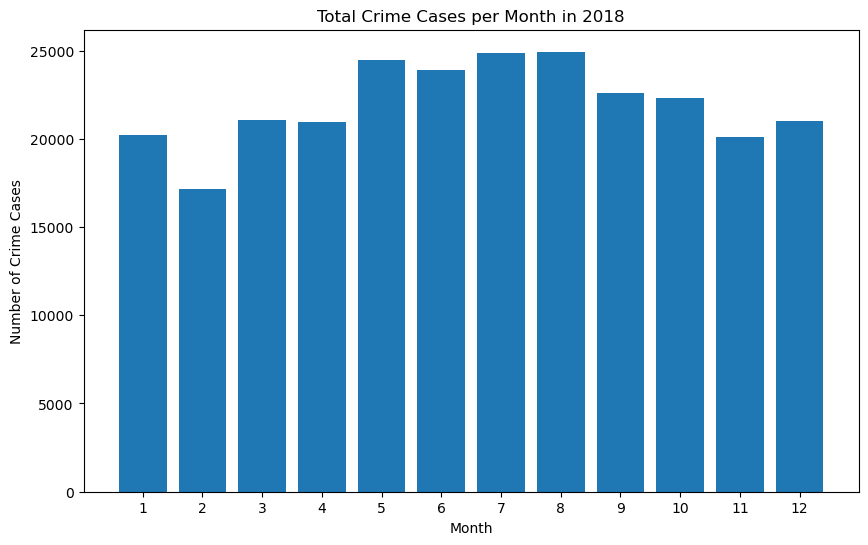

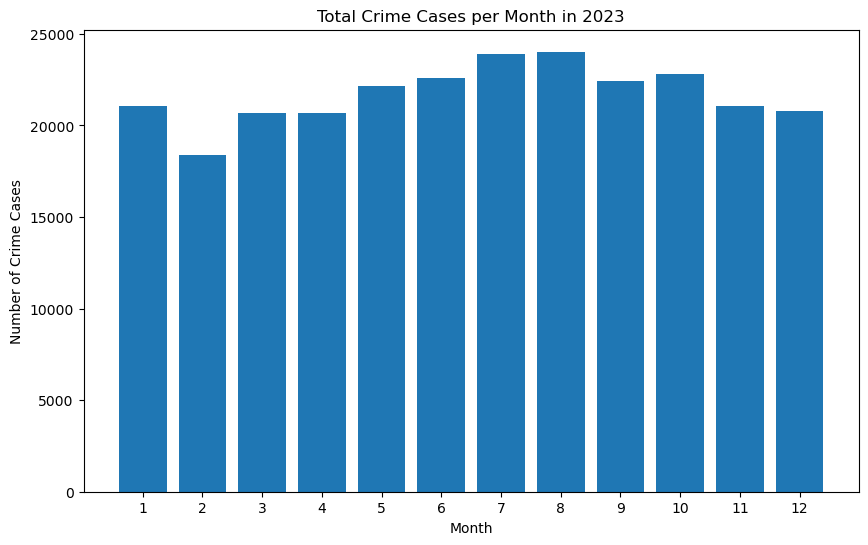

In [11]:


# randomly selecting 5 years to enhance accuracy
selected_years = [2001, 2005, 2010, 2018, 2023]
for year in selected_years:
    yearly_data = df[df['Year'] == year]
    monthly_counts = yearly_data.groupby('Month')['ID'].count()
    
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_counts.index, monthly_counts.values)
    plt.title(f'Total Crime Cases per Month in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Crime Cases')
    plt.xticks(range(1, 13))
    plt.show()


*The x variable is the month, and y variable is number of crime cases(different years are used to ensure the accuracy of the conclusions). It can be observed that the number of crimes occuring in June, July, and August is generally higher than in other months, and the fewest occur in November and December throughout the year. The temperatures in June, July and August are the highest of the year, while those in November and December are the lowest.

In [44]:
#due to the large amount of cases, all of them show on one plot will make the pattern vague
# random taking a sample with size 1000 will make the pattern clear
df2 = df.sample(n = 1000)

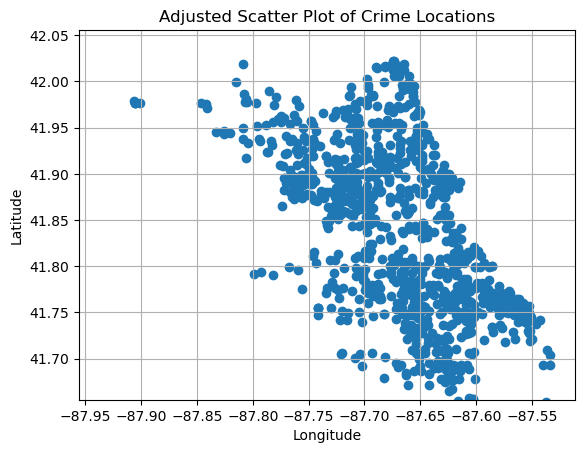

In [45]:
plt.scatter(df2['Longitude'], df2['Latitude'])
#Eventually there is a few outliers, which are far away from where most crimes happened. So I mannuly selected the
#range of latitude and longitude
plt.xlim(-87.955555, -87.5111111)
plt.ylim(41.6555555, 42.05555555)
plt.title('Adjusted Scatter Plot of Crime Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

*The scatterplot has longitude as the horizontal axis and latitude as the vertical axis. Based on the clustering of dots within the plot, we can infer which areas have a higher crime rate. It can be observed that there are more crime cases occurring in the vicinity of (41.90, -87.7) compared to other areas. According to the summary statistics table, the place where crimes occured most is airport, which is close to this coordinate.

### Conclusion

Up to this point, we have performed data cleaning to remove extraneous data, specifically excluding cases that lack location information. Additionally, we have created essential columns for our subsequent research—'month' and 'time'—to facilitate the observation of crime rate variations across different locations over time. Subsequently, we have crafted three plots: the first, a line chart, provides a macroscopic view of the variation in crime incidents over the years; the second, a histogram, examines the crime incidents with a more granular focus on monthly changes; and the third, a scatter plot, employs latitude and longitude to depict the fluctuations in the number of crime incidents at various locations. Each of these graphs distinctly illustrates the relationship between the x variables and the y variable.

Within the first chart, it is observable that from 2001 to the present, the incidence of crime in the city of Chicago has gradually declined. However, there was a slight uptick in 2020, which, when contextualized within the broader environmental framework, can be attributed to the COVID-19 pandemic and rising inflation. In the second histogram, data from five representative years between 2001 and 2023 were selected to ensure the accuracy of the conclusions. From this seasonal analysis, it is evident that the summer months, specifically June to August, experience the highest crime rates, while there is a significant reduction in criminal activities during the winter months. This trend distinctly reflects the seasonal variation in crime rates and provides a brief explanation in relation to the research question. The third graph indicates that the probability of crime occurrences is higher in the vicinity of (-78.7, 41.90) compared to other areas. Notably, O'Hare International Airport is located near this point and coincides with the summary data indicating the highest crime incidences at this location. This correlation effectively elucidates the variation in crime rates in accordance with locational changes.